### Date: 17 June 2020
# Name: Arjun Kumar 
# Email: Karnarjun2000@gmail.com
# -----------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------

## Zomato Dataset Details

#### Dataset Collection -
##### Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
##### Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 
Download Link


### Details of zomato.csv -


#### Restaurant Id : Unique id of every restaurant across various cities of the world
#### Restaurant Name : Name of the restaurant
#### Country Code : Country in which restaurant is located
#### City : City in which restaurant is located
#### Address : Address of the restaurant
#### Locality : Location in the city
#### Locality Verbose : Detailed description of the locality
#### Longitude : Longitude coordinate of the restaurant's location
#### Latitude : Latitude coordinate of the restaurant's location
#### Cuisines : Cuisines offered by the restaurant
#### Average Cost for two : Cost for two people in different currencies
#### Currency : Currency of the country
#### Has Table booking : yes/no
#### Has Online delivery : yes/ no
#### Is delivering : yes/ no
#### Switch to order menu : yes/no
#### Price range : range of price of food
#### Aggregate Rating : Average rating out of 5
#### Rating color : depending upon the average rating color
#### Rating text : text on the basis of rating of rating
#### Votes : Number of ratings casted by people


### Country Codes :
##### Country Code    Country  

##### 1                India

##### 14               Australia

##### 30               Brazil

##### 37               Canada

##### 94               Indonesia

##### 148              New Zealand

##### 162              Phillipines

##### 166              Qatar

##### 184               Singapore

##### 189               South Africa

##### 191               Sri Lanka

##### 208               Turkey

##### 214               UAE

##### 215               United Kingdom

##### 216               United States



# --------------------------------------------------------------------------------------------------------

### Consider only Indian restaurants in this analysis -

### 1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.


####    1.1 . Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Number of Restaurant in Delhi-NCR:  6829
Number of Restaurant in Rest in India:  1823


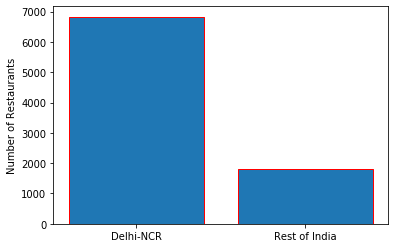

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
data["City"].replace("New Delhi","Delhi-NCR",inplace=True)# cnverting the name of New Delhi to Delhi-NCR
data["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
data["City"].replace("Noida","Delhi-NCR",inplace=True)
data["City"].replace("Guraon","Delhi-NCR",inplace=True)
data["City"].replace("Faridabad","Delhi-NCR",inplace=True)
india=data[data["Country Code"]==1] #India's country code is 1
delhi_ncr=india[india["City"]=="Delhi-NCR"]
non_delhi_ncr=india[india["City"]!="Delhi-NCR"]
delhi_ncr_count=delhi_ncr.shape[0]# Number of rows in delhi_ncr
non_delhi_ncr_count=non_delhi_ncr.shape[0]
print("Number of Restaurant in Delhi-NCR: ",delhi_ncr_count)
print("Number of Restaurant in Rest in India: ",non_delhi_ncr_count)
plt.bar(["Delhi-NCR","Rest of India"],[delhi_ncr_count,non_delhi_ncr_count],edgecolor="r")
plt.ylabel("Number of Restaurants")
plt.show()


# ------------------------------------------------------------------------------------------------------------

####    1.2 . Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
data["City"].replace("New Delhi","Delhi-NCR",inplace=True)# cnverting the name of New Delhi to Delhi-NCR
data["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
data["City"].replace("Noida","Delhi-NCR",inplace=True)
data["City"].replace("Guraon","Delhi-NCR",inplace=True)
data["City"].replace("Faridabad","Delhi-NCR",inplace=True)
india=data[data["Country Code"]==1] #India's country code is 1
delhi_ncr=india[india["City"]=="Delhi-NCR"]
non_delhi_ncr=india[india["City"]!="Delhi-NCR"]
cuisines_of_ncr=delhi_ncr["Cuisines"].values
cuisines_of_ncr_delhi=[]
for i in cuisines_of_ncr:
    j=i.split(',')
    cuisines_of_ncr_delhi=cuisines_of_ncr_delhi+j
cuisines_of_ncr=set(cuisines_of_ncr_delhi)

cuisines_of_non_ncr=non_delhi_ncr["Cuisines"].values
cuisines_of_non_ncr_delhi=[]
for i in cuisines_of_non_ncr:
    j=i.split(',')
    for k in range(len(j)):
        j[k]=j[k].strip()
        
    cuisines_of_non_ncr_delhi=cuisines_of_non_ncr_delhi+j
cuisines_of_non_ncr=set(cuisines_of_non_ncr_delhi)

cuisines_in_only_non_ncr=cuisines_of_non_ncr-cuisines_of_ncr
for i in cuisines_in_only_non_ncr:
    print(i)


Armenian
Steak
Persian
German
Belgian
Greek
Pakistani
African
BBQ
Mangalorean
Sandwich
Indian
Indonesian
Andhra
Cajun
Malwani
Iranian
Chettinad
Tex-Mex
Charcoal Grill


# ------------------------------------------------------------------------------------------------------------

####    1.3 . Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Number of Resataurants in Delhi-NCR related to certain Cuisine

North Indian    3089
Chinese         2124
Fast Food       1646
Mughlai          816
Bakery           587
South Indian     499
Street Food      466
Desserts         465
Italian          451
Continental      444
dtype: int64


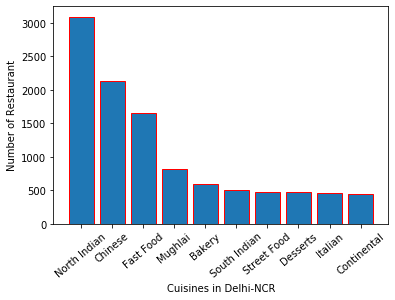


Number of Resataurants in Rest in India related to certain Cuisine

North Indian    857
Chinese         566
Fast Food       317
Continental     280
Italian         231
Cafe            214
Mughlai         176
Bakery          139
Desserts        132
South Indian    132
dtype: int64


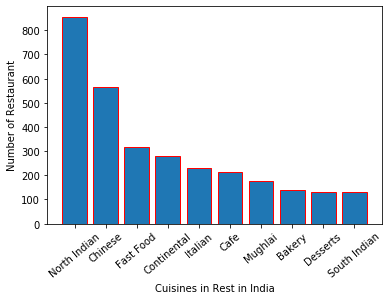

In [7]:
#For top 10 Restaurants for Delhi-NCR
print("Number of Resataurants in Delhi-NCR related to certain Cuisine")
print()
cuisine_over_delhi_ncr=delhi_ncr["Cuisines"].values
cuisine_over_delhi_ncr_splitted=[]
for i in cuisine_over_delhi_ncr:
    j=i.split(',')
    for k in range(len(j)):
        j[k]=j[k].strip()
    cuisine_over_delhi_ncr_splitted=cuisine_over_delhi_ncr_splitted+j
cuisine_over_delhi_ncr=pd.Series(cuisine_over_delhi_ncr_splitted)
no_restaurant_in_delhi_ncr=cuisine_over_delhi_ncr.value_counts()
top_10_delhi_ncr=no_restaurant_in_delhi_ncr.head(10)
print(top_10_delhi_ncr)
import matplotlib.pyplot as plt
plt.bar(top_10_delhi_ncr.index,top_10_delhi_ncr.values,edgecolor='r')
plt.ylabel("Number of Restaurant")
plt.xlabel("Cuisines in Delhi-NCR")
plt.xticks(rotation=40)

plt.show()
print()

#For top 10 Restaurants for Rest in India
print("Number of Resataurants in Rest in India related to certain Cuisine")
print()
cuisine_over_non_delhi_ncr=non_delhi_ncr["Cuisines"].values
cuisine_over_non_delhi_ncr_splitted=[]
for i in cuisine_over_non_delhi_ncr:
    j=i.split(',')
    for k in range(len(j)):
        j[k]=j[k].strip()
    cuisine_over_non_delhi_ncr_splitted=cuisine_over_non_delhi_ncr_splitted+j
cuisine_over_non_delhi_ncr=pd.Series(cuisine_over_non_delhi_ncr_splitted)
no_restaurant_in_non_delhi_ncr=cuisine_over_non_delhi_ncr.value_counts()
top_10_non_delhi_ncr=no_restaurant_in_non_delhi_ncr.head(10)
print(top_10_non_delhi_ncr)
import matplotlib.pyplot as plt
plt.bar(top_10_non_delhi_ncr.index,top_10_non_delhi_ncr.values,edgecolor='r')
plt.ylabel("Number of Restaurant")
plt.xlabel("Cuisines in Rest in India")
plt.xticks(rotation=40)

plt.show()
    
        


# ------------------------------------------------------------------------------------------------------------

####    1.4 . Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable            graph to explain your inference.

### Difference between cuisines in Delhi-NCR and Rest in India -

#### Above two bar graph (Cuisines in Delhi-NCR and Cuisines in Rest in India) show their top ten couisines
#### North Indian food is in top in our country, but more famous in Delhi-NCR than comparatively in Rest In India.
#### Fast Food  and Chinese food in Delhi-NCR are more famous than Rest In India.
#### Dessert types of cuisine is more famous in Delhi-NCR than in Rest in India
#### More important point is that South Indian food is also famous in Delhi-NCR than rest in India
#### Number of Restaurant in Delhi-NCR:  6829
#### Number of Restaurant in Rest in India:  1823
Graphs are shown in above , to show thier differences


# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------

# 2.User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

####     2.1 . Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#####                1. Number of Votes given Restaurant

      Votes  Aggregate rating
624     140               3.9
625      71               3.5
626      94               3.6
627      87               4.0
628     177               4.2
...     ...               ...
9271    193               3.6
9272     85               3.7
9273    172               4.3
9274     74               3.8
9275    316               4.4

[8652 rows x 2 columns]


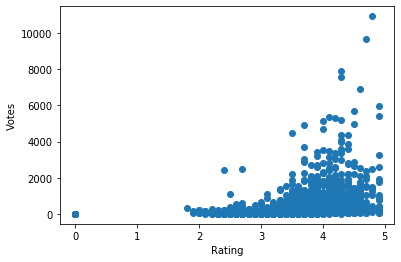

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
votes_vs_rating=india[["Votes","Aggregate rating"]]
print(votes_vs_rating)



plt.scatter(votes_vs_rating["Aggregate rating"],votes_vs_rating["Votes"])
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()


## Conclusion for Votes effects on Rating
###### Generally, there is no any certain direct relation between Rating and Votes.
###### But following conclusion can be drawn:
###### For many restaurant, higher number of votes means higher rating ,clearly shown by graph.
###### At, zero rating, Votes is also zero, so rating 0 is not satisfactorial analysis of overall restaurant, but for individaual restaurant can matter.
###### At, low level of voting, like below 1000, rating variance is hight, but not for higher number of votes.

# ------------------------------------------------------------------------------------------------------------

####     2.1 . Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#####                2. Restaurant serving more number of cuisines.


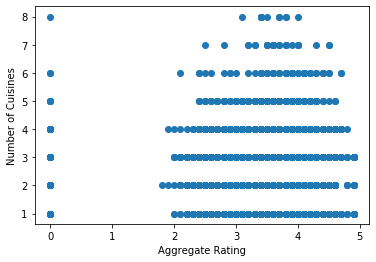

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
cuisines_vs_rating=india.loc[:,("Cuisines","Aggregate rating")]
def fun(k):
    k=k.split(",")
    return len(k)
cuisines_vs_rating["No._Cuisines"]=cuisines_vs_rating["Cuisines"].apply(fun)

plt.scatter(cuisines_vs_rating["Aggregate rating"],cuisines_vs_rating["No._Cuisines"])
plt.ylabel("Number of Cuisines")
plt.xlabel("Aggregate Rating")
plt.show()

## Conclusion for "Number of Cuisines" effects on Rating
### As we can see from graph that all level of Number of Cuisines has rating from 2 to 5, either it is 1,2 or 6.
### But Restaurant with Number of Cuisines with 7 or 8 has not highest rating like 4 to 5 but other has.
### Also can be seen that there is zero rating for all level of Number of cuisines, but no any conclusion can be drawn as it may be the case of zero voting, hence zero rating.
### Higher Number of Cuisines also not have lower rating like below 2 or 3

# ------------------------------------------------------------------------------------------------------------

####    2.1 . Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#####               3.  Average Cost of Restaurant

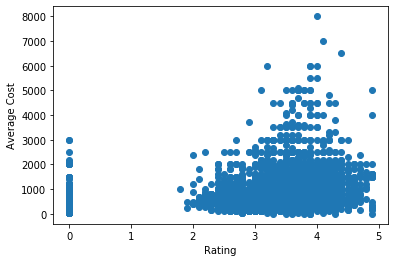

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
avg_cost_vs_rating=india.loc[:,("Average Cost for two","Aggregate rating")]


plt.scatter(avg_cost_vs_rating["Aggregate rating"],avg_cost_vs_rating["Average Cost for two"])
plt.ylabel("Average Cost")
plt.xlabel("Rating")
plt.show()



## Conclusion for "Average Cost" effects on Rating
### Graph clearly showing not much certain trend between Cost and Rating
### Here, zero rating again can not be concluded as may be the case of zero voting. If this is not a case, then zero rating is only for lower cost restaurant.
### Highest cost Restaurant also not having best rating as in graph 8000 cost type restaurant have rating 4.
### cost between 500 to 2500 has generally best type of rating and this region is more concentrated

# ------------------------------------------------------------------------------------------------------------

####     2.1 . Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#### 4. Restaurant serving some specific cuisines.

          Cuisines  Aggregate rating  No._Cuisines
626   North Indian               3.6             1
627     Rajasthani               4.0             1
631        Mughlai               4.0             1
664    Continental               4.0             1
672      Fast Food               3.3             1
...            ...               ...           ...
9245  North Indian               3.3             1
9247       Chinese               3.5             1
9264     Fast Food               3.8             1
9268     Fast Food               3.7             1
9275       Italian               4.4             1

[3097 rows x 3 columns]


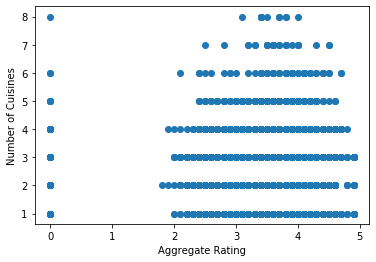

In [9]:
# some specific cuisines means Restaurant serving only 1 cuisines
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
cuisines_vs_rating=india.loc[:,("Cuisines","Aggregate rating")]
def fun(k):
    k=k.split(",")
    return len(k)
cuisines_vs_rating["No._Cuisines"]=cuisines_vs_rating["Cuisines"].apply(fun)
cuisines_vs_rating_1_cuisines=cuisines_vs_rating[cuisines_vs_rating["No._Cuisines"]==1]
print(cuisines_vs_rating_1_cuisines)


plt.scatter(cuisines_vs_rating["Aggregate rating"],cuisines_vs_rating["No._Cuisines"])
plt.ylabel("Number of Cuisines")
plt.xlabel("Aggregate Rating")
plt.show()

#### As from graph we can see that restaurant having Number of Cuisines as 1 i.e specific Cuisines ,has rating 0 or from 2 to 5. 
#### But there are many restaurant which have rating 0, ie. some Restaurant having cuisines one if preffered less, even then for some restaurant rating is between 2 to 5.

# ------------------------------------------------------------------------------------------------------------

####      2.2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
#####              1. Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

       Locality and its Weighted Rating

                                     Weighted Rating
Locality                                            
 ILD Trade Centre Mall, Sohna Road          2.816667
12th Square Building, Banjara Hills         4.300000
A Hotel, Gurdev Nagar                       3.600000
ARSS Mall, Paschim Vihar                    3.100000
Aaya Nagar                                  0.000000
...                                              ...
Yusuf Sarai                                 3.299463
Z Square Mall, Mall Road                    4.000000
Zakir Nagar                                 0.000000
Zoo Tiniali                                 4.219497
ibis New Delhi, Aerocity                    3.100000

[784 rows x 1 columns]


Top 10 Locality with highest Weighted Rating

                             Weighted Rating
Locality
Aminabad                            4.900000
Hotel Clarks Amer, Malviya Nagar    4.900000
Friends Colony                      4.886916
Powai    

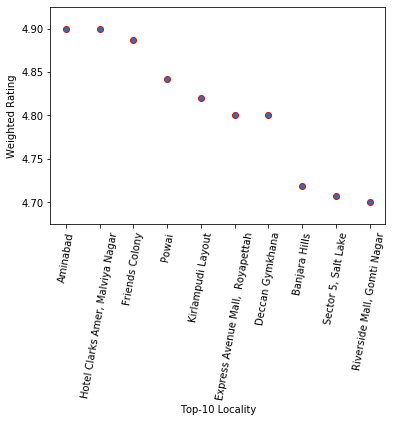

In [8]:


import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
locality_rating_votes=india.loc[:,("Locality","Aggregate rating","Votes")]
locality_rating_votes["Aggregate rating"]=locality_rating_votes["Aggregate rating"]*locality_rating_votes["Votes"]


locality_votes=locality_rating_votes.groupby("Locality")["Votes"].agg("sum")#
locality_rating=locality_rating_votes.groupby("Locality")["Aggregate rating"].agg("sum")
locality_rating_votes=pd.DataFrame(locality_rating)
locality_rating_votes["Votes"]=locality_votes

locality_rating_votes["Weighted Rating"]=locality_rating_votes["Aggregate rating"]/locality_rating_votes["Votes"]
locality_weighted=locality_rating_votes[["Weighted Rating"]]#.sort_values(ascending=False)
print("       Locality and its Weighted Rating")
print()
print(locality_weighted)
print()
print()
print("Top 10 Locality with highest Weighted Rating")
print()
print("                             Weighted Rating")
top_10=(locality_weighted["Weighted Rating"].sort_values(ascending=False)).head(10)
print(top_10)

plt.scatter(top_10.index,top_10.values,edgecolor='r')
plt.xlabel("Top-10 Locality")
plt.ylabel("Weighted Rating")
plt.xticks(rotation=80)
plt.show()




# ------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------

# 3. Visualization


#### 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           29
Giani               29
Baskin Robbins      28
Barbeque Nation     25
Giani's             22
Dunkin' Donuts      22
Barista             22
Costa Coffee        20
Pind Balluchi       20
Name: Restaurant Name, dtype: int64


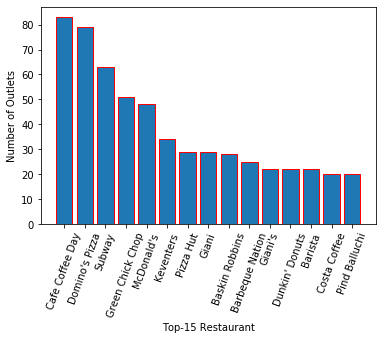

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
outlet=india["Restaurant Name"]
top_15=(outlet.value_counts()).head(15)
print(top_15)

plt.bar(top_15.index,top_15,edgecolor='r')
plt.xlabel("Top-15 Restaurant")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=70)
plt.show()

#### Cafe Coffee Day has 83 oultets in India collaborated with Zomato.
#### Domino's Pizza has 87 over India

# ------------------------------------------------------------------------------------------------------------

#### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

Rating Number of such Rating
0.0    2139
3.1     511
3.2     510
3.4     477
3.3     472
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


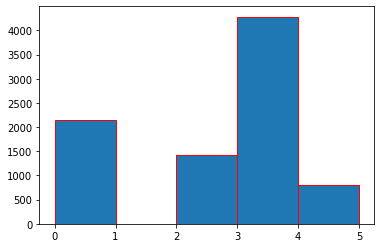

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
rating=india["Aggregate rating"].dropna().sort_values(ascending=False)
count=rating.value_counts()
print("Rating","Number of such Rating")
print(count)
plt.hist(rating,bins=[0,1,2,3,4,5],edgecolor='r')
plt.show()


### Highest Number of rating is 3 to 4.
### Lowest Number of rating is 1 to 2

# ------------------------------------------------------------------------------------------------------------

#### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

                Restaurant Name  Votes  Restaurant ID
728                        Toit  10934          51705
735                    Truffles   9667          51040
3994           Hauz Khas Social   7931         308322
2412                  Peter Cat   7574          20404
739   AB's - Absolute Barbecues   6907          56618
2414            Barbeque Nation   5966          20842
743                 Big Brewsky   5705          58882
2307  AB's - Absolute Barbecues   5434          94286
736             The Black Pearl   5385          54162
2411                      BarBQ   5288          20870


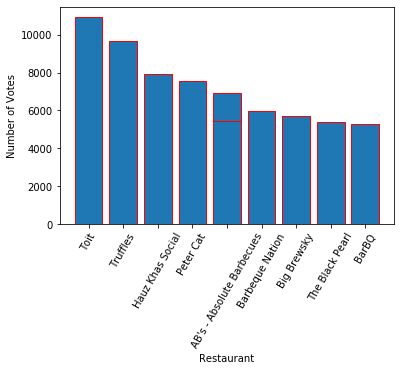

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
name_votes=data.loc[:,("Restaurant Name","Votes","Restaurant ID")]
name_votes.sort_values(by=["Votes"],inplace=True,ascending=False)
name_votes=name_votes.head(10)
print(name_votes)
plt.bar(name_votes["Restaurant Name"],name_votes["Votes"],edgecolor='r')
plt.xlabel("Restaurant")
plt.ylabel("Number of Votes")
plt.xticks(rotation=60)
plt.show()


### Two AB's - Absolute Barbecues's outlet is in top 10, so bar for these two overlap, separted by red horizontal line

# ------------------------------------------------------------------------------------------------------------

#### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Cuisines    Number of Restaurant

American     112
Seafood       59
Burger        49
Pizza         49
Sandwich      49
Steak         42
Italian       38
Breakfast     37
Mexican       36
Sushi         34
dtype: int64


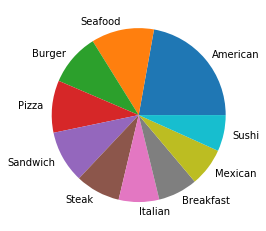

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
Usa=data[data["Country Code"]==216]

cuisine_over_Usa=Usa["Cuisines"]
cuisine_over_Usa.dropna(inplace=True)
cuisine_over_Usa=cuisine_over_Usa.values


cuisine_over_Usa_splitted=[]
for i in cuisine_over_Usa:
    j=i.split(',')
    for k in range(len(j)):
        j[k]=j[k].strip()
    cuisine_over_Usa_splitted=cuisine_over_Usa_splitted+j
cuisine_over_Usa=pd.Series(cuisine_over_Usa_splitted)
no_restaurant_in_Usa=cuisine_over_Usa.value_counts()
Top_10=no_restaurant_in_Usa.head(10)
print("Cuisines    Number of Restaurant")
print()
print(Top_10)
plt.pie(Top_10,labels=Top_10.index)
plt.show()


# ------------------------------------------------------------------------------------------------------------ 

#### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

              Weighted Rating  counts
City                                 
Agra                 4.006984      20
Ahmedabad            4.163215      21
Allahabad            3.409626      20
Amritsar             3.764584      21
Aurangabad           3.427315      20
Bangalore            4.497423      20
Bhopal               4.125930      20
Bhubaneshwar         3.967759      21
Chandigarh           4.106691      18
Chennai              4.319682      20
Coimbatore           4.174994      20
Dehradun             4.016173      20
Faridabad            3.482979     251
Ghaziabad            3.037870      25
Goa                  4.158438      20
Gurgaon              3.743958    1118
Guwahati             4.265733      21
Hyderabad            4.487773      18
Indore               3.998346      20
Jaipur               4.281508      20
Kanpur               3.853793      20
Kochi                4.137380      20
Kolkata              4.295152      20
Lucknow              4.323527      21
Ludhiana    

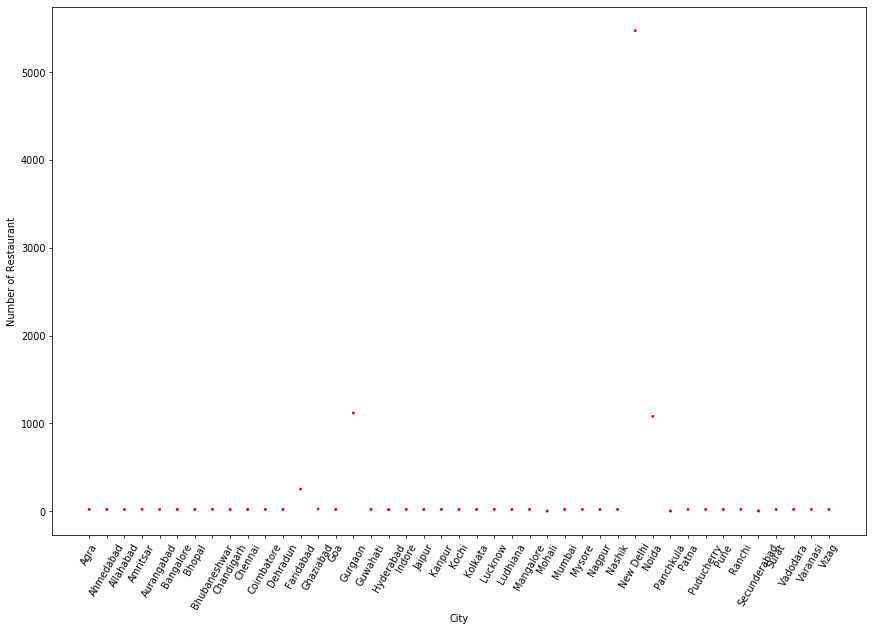

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Downloads\zomato.csv")
india=data[data["Country Code"]==1]
count=india["City"].value_counts()
city_rating_votes=india.loc[:,("City","Aggregate rating","Votes")]

city_rating_votes["Aggregate rating"]=city_rating_votes["Aggregate rating"]*city_rating_votes["Votes"]



city_votes=city_rating_votes.groupby("City")["Votes"].agg("sum")#
city_rating=city_rating_votes.groupby("City")["Aggregate rating"].agg("sum")
city_rating_votes=pd.DataFrame(city_rating)
city_rating_votes["Votes"]=city_votes

city_rating_votes["Weighted Rating"]=city_rating_votes["Aggregate rating"]/city_rating_votes["Votes"]
city_weighted=city_rating_votes[["Weighted Rating"]]#.sort_values(ascending=False)

a=pd.DataFrame(city_weighted)
a["counts"]=count
print(a)

plt.figure(figsize=(15, 10), dpi=70)
plt.scatter(a.index,a.counts,s=a['Weighted Rating'] ,c='b',edgecolor='r')
plt.xlabel("City")

plt.ylabel("Number of Restaurant")
plt.xticks(rotation=60)
plt.show()



# ------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------